# Import Libraries

In [652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
                                    LinearRegression, 
                                    Ridge,
                                    Lasso, 
                                    ElasticNet
                                    )

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import (
                                    GridSearchCV, 
                                    RandomizedSearchCV, 
                                    cross_val_score
                                    )
from skopt import BayesSearchCV

# Load Dataset

In [653]:
df = pd.read_csv("used_cars_preprocessed.csv")
display(df.head())
display(df.info())

,selling_price,km_driven,owner,mileage_kmpl,engine_CC,max_power_BHP,seats,torque_Nm,torque_rpm,age,...,max_power_age,price_to_km,price_to_age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.275667,1.440616,-0.705681,0.794596,0.092117,-0.254164,-0.232492,0.902844,-1.219044,-0.154831,...,-0.281633,-0.700104,-0.052256,1.048809,-1.048809,-0.346497,0.380832,-0.14092,-0.212448,0.212448
1,-0.104548,0.941009,0.889250,0.114536,1.250782,1.591933,-0.232492,1.796247,-0.649832,-0.154831,...,0.601242,-0.701436,-0.276631,1.048809,-1.048809,-0.346497,0.380832,-0.14092,-0.212448,0.212448
2,-1.112115,1.332858,2.484181,-0.920599,1.246148,-0.004015,-0.232492,0.446412,-0.001785,2.036461,...,-1.198812,-0.975558,-1.068176,-0.953463,0.953463,-0.346497,0.380832,-0.14092,-0.212448,0.212448
3,-0.793686,1.078156,-0.705681,0.674231,0.778047,0.746431,-0.232492,0.446412,-0.365226,0.940815,...,-0.572156,-0.885372,-0.863612,1.048809,-1.048809,-0.346497,0.380832,-0.14092,-0.212448,0.212448
4,-1.245190,0.941009,-0.705681,-1.402058,0.323850,0.633864,-0.232492,0.446412,-0.001785,1.762549,...,-0.943131,-0.981911,-1.099889,-0.953463,0.953463,-0.346497,0.380832,-0.14092,-0.212448,0.212448


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 5187 non-null   float64
 1   km_driven                     5187 non-null   float64
 2   owner                         5187 non-null   float64
 3   mileage_kmpl                  5187 non-null   float64
 4   engine_CC                     5187 non-null   float64
 5   max_power_BHP                 5187 non-null   float64
 6   seats                         5187 non-null   float64
 7   torque_Nm                     5187 non-null   float64
 8   torque_rpm                    5187 non-null   float64
 9   age                           5187 non-null   float64
 10  max_power_engineCC            5187 non-null   float64
 11  max_power_to_torque_rpm       5187 non-null   float64
 12  max_power_age                 5187 non-null   float64
 13  pri

None

# Single Variable LinearRegression

In [654]:
# مشخص کردن X, y
X = df[['max_power_age']]
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
slr_model = LinearRegression()

# اموزش مدل
slr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = slr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = slr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"SLR MSE: {mse}")
print(f"SLR R-Squared: {r2}")
print(f"SLR Score: {score}")

SLR MSE: 0.2853931745971363
SLR R-Squared: 0.7120303865255734
SLR Score: 0.7123595616277765


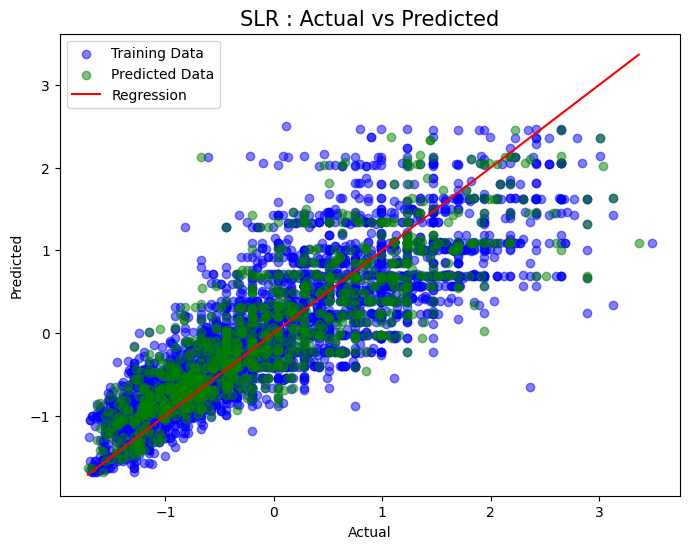

In [655]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, slr_model.predict(X_train), color='blue', alpha=0.5, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label="Regression")

plt.title('SLR : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Multi-Variable LinearRegression

In [656]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
mlr_model = LinearRegression()

# اموزش مدل
mlr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = mlr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = mlr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"MLR MSE: {mse}")
print(f"MLR R-Squared: {r2}")
print(f"MLR Score: {score}")


MLR MSE: 0.02929394837234254
MLR R-Squared: 0.9704415951718842
MLR Score: 0.9681864637328449


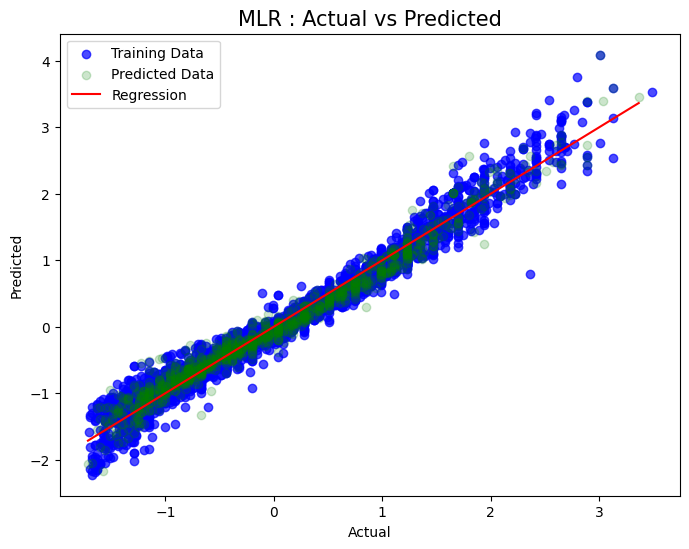

In [657]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, mlr_model.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('MLR : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Polynomial Regression

In [658]:
X = df[['engine_CC', 'max_power_BHP', 'torque_Nm', 'age',
       'max_power_engineCC', 'max_power_to_torque_rpm', 'price_to_km','max_power_age',
       'fuel_Diesel', 'fuel_Petrol']]

y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
poly_model = LinearRegression()
pf = PolynomialFeatures(degree=3)

# تدبیل و اموزش داده های اموزشی
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# اموزش مدل
poly_model.fit(X_train_poly, y_train)

# پیشبینی با مدل
y_pred = poly_model.predict(X_test_poly)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = poly_model.score(X_test_poly, y_test)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"Polynomial MSE: {mse}")
print(f"Polynomial R-Squared: {r2}")
print(f"Polynomial Score: {score}")


Polynomial MSE: 0.11977181694392748
Polynomial R-Squared: 0.8791469211582936
Polynomial Score: 0.8791469211582936


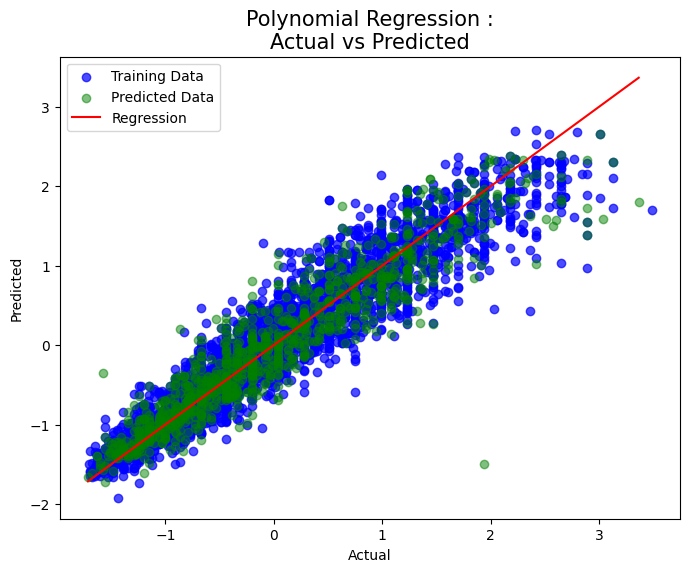

In [659]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, poly_model.predict(X_train_poly), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Polynomial Regression :\nActual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()

# Ridge Regression

In [660]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
ridge_model = Ridge()

# اموزش مدل
ridge_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.029330234148117813
Ridge R-Squared: 0.9704049818196575


### Ridge Regression Hyperparameter Optimization Using BayesOptimization

In [661]:
ridge_model = Ridge()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

opt = BayesSearchCV(
                    estimator=ridge_model,
                    search_spaces=params,
                    n_iter=5,
                    cv=10,
                    verbose=1,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Bayesian Optimization : 
Best parameters: OrderedDict([('alpha', 0.4)])
Best R2 Score: 0.9671866388758094


### Ridge Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [662]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
ridge_model_tuned = Ridge(alpha=0.5)

# اموزش مدل
ridge_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.029310919624429395
Ridge R-Squared: 0.9704244707087273


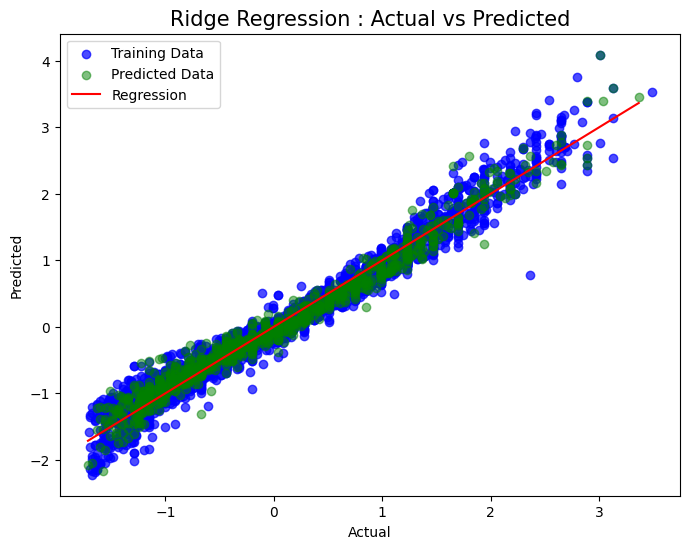

In [663]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, ridge_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط گرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Ridge Regression : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Lasso Regression

In [664]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
lasso_model = Lasso()
# آموزش مدل
lasso_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.9918017205857412
Lasso R-Squared: -0.0007553913071509655


### Lasso Regression Hyperparameter Optimization Using BayesOptimization

In [665]:
lasso_model = Lasso()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
opt = BayesSearchCV(
                    estimator=lasso_model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=2,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

### Lasso Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [666]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
lasso_model_tuned = Lasso(alpha=0.0001)
# آموزش مدل
lasso_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.02930156714148609
Lasso R-Squared: 0.9704339076229141


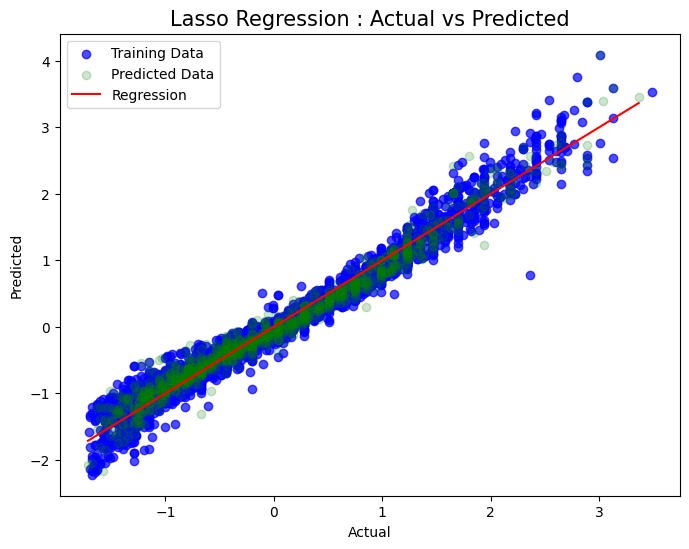

In [667]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, lasso_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط رگرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Lasso Regression : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()

# ElasticNet Regression

In [668]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
elastic_model = ElasticNet()
# آموزش مدل
elastic_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")


ElasticNet MSE: 0.49488315104492214
ElasticNet R-Squared: 0.5006492011500175


### ElasticNet Regression Hyperparameter Optimization Using CrossValidation

In [669]:
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]
print("cross_val_score : \n")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

cross_val_score : 

Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}
Best R2 Score: 0.9671860890410009


### ElasticNet Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [670]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
elastic_model_tuned = ElasticNet(alpha=0.0001, l1_ratio=0.1)

# آموزش مدل
elastic_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")

ElasticNet MSE: 0.02930720586759448
ElasticNet R-Squared: 0.9704282179921786


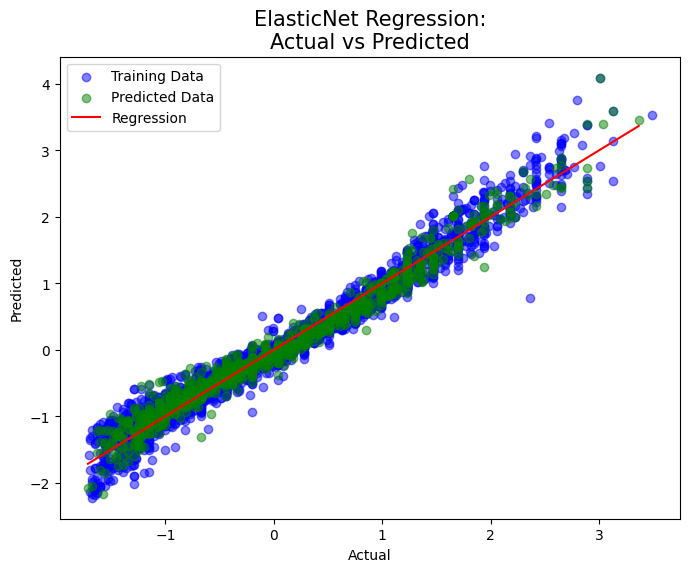

In [671]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, elastic_model_tuned.predict(X_train), color='blue', alpha=0.5, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط رگرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('ElasticNet Regression:\nActual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()